# Discriminant Analysis and KNN

In this tutorial, we will learn about classification with discriminant analysis and the K-nearest neighbor (KNN) algorithm. KNN can be used for both regression and classification and will serve as our first example for hyperparameter tuning. We will be using two data sets to demonstrate the algorithms in this lesson,  `churn_df` and `home_sales`.



The code below will install and load the required packages and data sets for this tutorial. We will need a new package for this lesson, `discrim`. This packages is part of `tidymodels` and serves as a general interface to discriminant analysis algorithms in `R`.

When installing `discrim`, you will also need to install the `klaR` package.

In [2]:
install.packages(c('discrim', 'klaR'),
                 repos = 'https://mran.microsoft.com/snapshot/2023-01-01/')

Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/discrim_1.0.0.tar.gz' ...
	OK [downloaded 122.6 Kb in 0.5 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/klaR_1.7-1.tar.gz' ...
	OK [downloaded 547.2 Kb in 0.5 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/combinat_0.0-8.tar.gz' ...
	OK [downloaded 39.4 Kb in 0.5 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/questionr_0.7.7.tar.gz' ...
	OK [downloaded 3.7 Mb in 0.6 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/styler_1.8.1.tar.gz' ...
	OK [downloaded 693 Kb in 0.5 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/R.cache_0.16.0.tar.gz' ...
	OK [downloaded 105.3 Kb in 0.4 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/R.methodsS3_1.8.2.t

In [3]:
library(tidymodels)
library(discrim) # for discriminant analysis

# Telecommunications customer churn data
churn_df <- readRDS(url('https://gmubusinessanalytics.netlify.app/data/churn_data.rds'))


# Seattle home sales
home_sales <- 
  readRDS(url('https://gmubusinessanalytics.netlify.app/data/home_sales.rds')) %>% 
  select(-selling_date)


Attaching package: ‘discrim’


The following object is masked from ‘package:dials’:

    smoothness




<br>

We will be working with the `churn_df` and `home_sales` data frames in this lesson.

Take a moment to explore these data sets below

## Telecommunication Customer Churn

A row in this data frame represents a customer at a telecommunications company. Each customer has purchased phone and internet services from this company.

The outcome variable in this data is `churn` which indicates whether the customer terminated their services.

In [4]:
churn_df

churn,enrollment_discount,tv_plan,movie_plan,monthly_charges,late_payments
<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
yes,yes,yes,no,63.85686,2
no,no,no,no,61.20185,0
yes,yes,no,no,93.74028,1
yes,no,yes,yes,110.69285,5
no,no,yes,no,42.45980,4
no,no,no,no,76.04233,0
no,yes,yes,no,66.10153,0
yes,yes,yes,no,109.64420,0
no,yes,no,yes,78.71100,0


## Seattle Home Sales

A row in this data frame represents a home that was sold in the Seattle area between 2014 and 2015. 

The outcome variable in this data is `selling_price`.

In [ ]:
home_sales

# Linear Discriminant Analysis

Linear discriminant analysis (LDA) is a classification algorithm where the set of predictor variables are assumed to follow a  multivariate normal distribution with a common covariance matrix. As we saw in our lecture, this algorithm produces a linear decision boundary.

Both linear and quadratic discriminant analysis can be specified with the `discrim_regularized()` function from the `discrim` package.

Let's use LDA to predict whether customers will cancel their telecommunications service in the `churn_df` data frame. We will follow our standard machine learning workflow that was introduced in the logistic regression tutorial.

## Data Splitting

In this case, our event of interest is `churn == 'yes'`. This is what we would like to map to the positive class when calculating our performance metrics.

The code below shows that `yes` is mapped to the first level of the `churn` variable. Since `todymodels` maps the first level to the positive class in all performance metrics functions, we do not need to recode the levels of this variable.

In [4]:
levels(churn_df$churn)

[1] "yes" "no"

<br>

Now we can proceed to split our data with `initial_split()`. 

In [5]:
set.seed(314) # Remember to always set your seed. Any integer will work

churn_split <- initial_split(churn_df, prop = 0.75, strata = churn)

churn_training <- 
  churn_split %>% 
  training()

churn_test <- 
  churn_split %>% 
  testing()

## Feature Engineering

We have a mixture of numeric and factor predictor variables in our data. We will use `step_dummy()` to convert all factor variables to numeric indicator variables. 

It is also standard practice to center and scale our numeric predictors. If needed, we can also adjust for skewness with `step_YeoJohnson()`. 

Let's make histograms of our numeric predictors to see if this is needed. We have skewness present in `late_payments`.

## Histograms of Numeric Predictors

In [6]:
# This code adjust the figure output size
options(repr.plot.width=11, repr.plot.height=8)

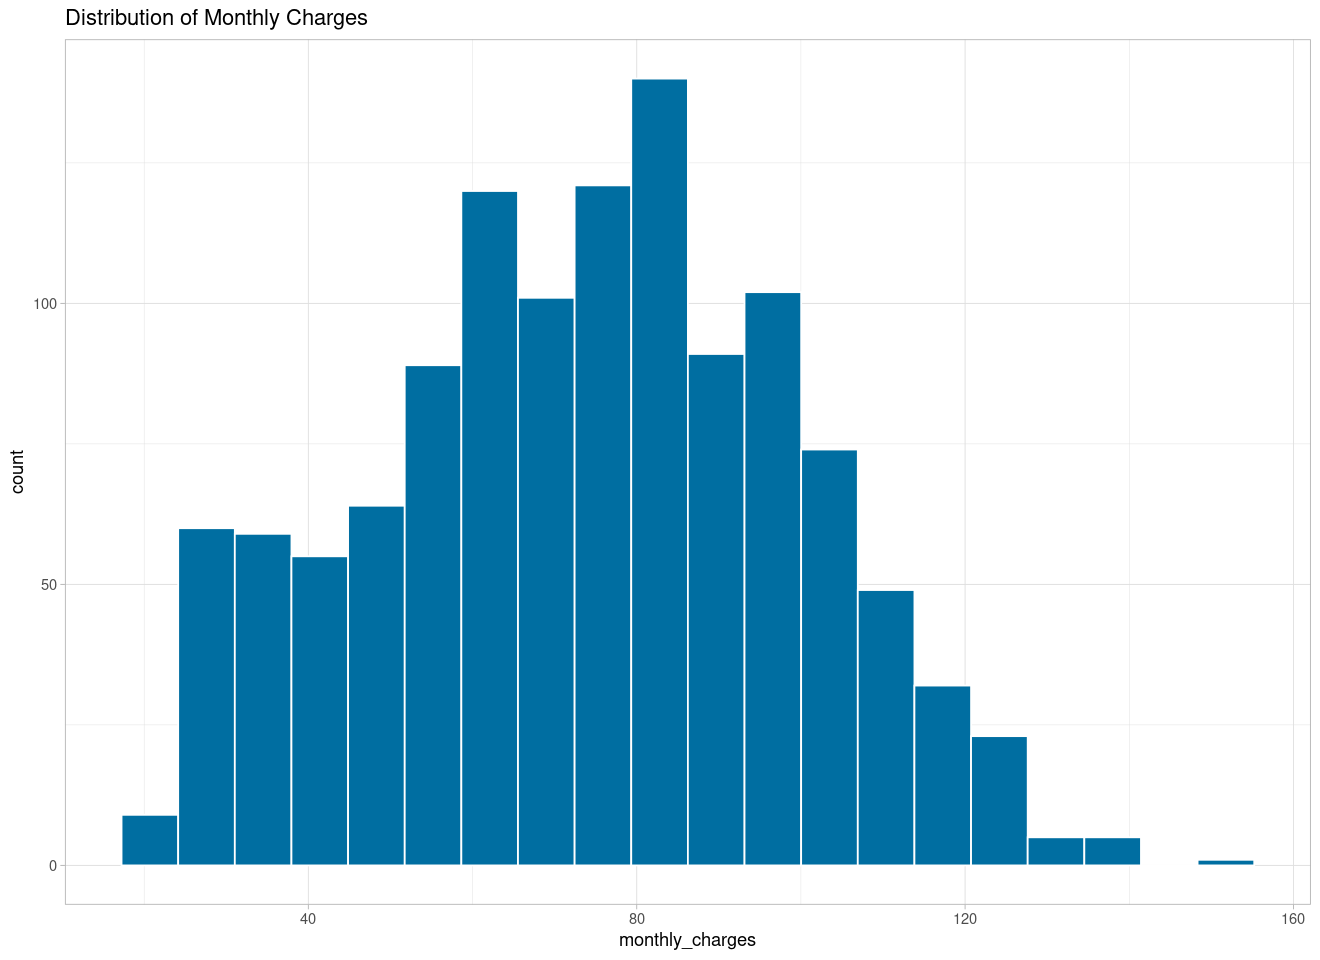

In [7]:
# monthly_charges
ggplot(data = churn_df, mapping = aes(x = monthly_charges)) +
  geom_histogram(fill = '#006EA1', color = 'white', bins = 20) +
  labs(title = 'Distribution of Monthly Charges') +
  theme_light()

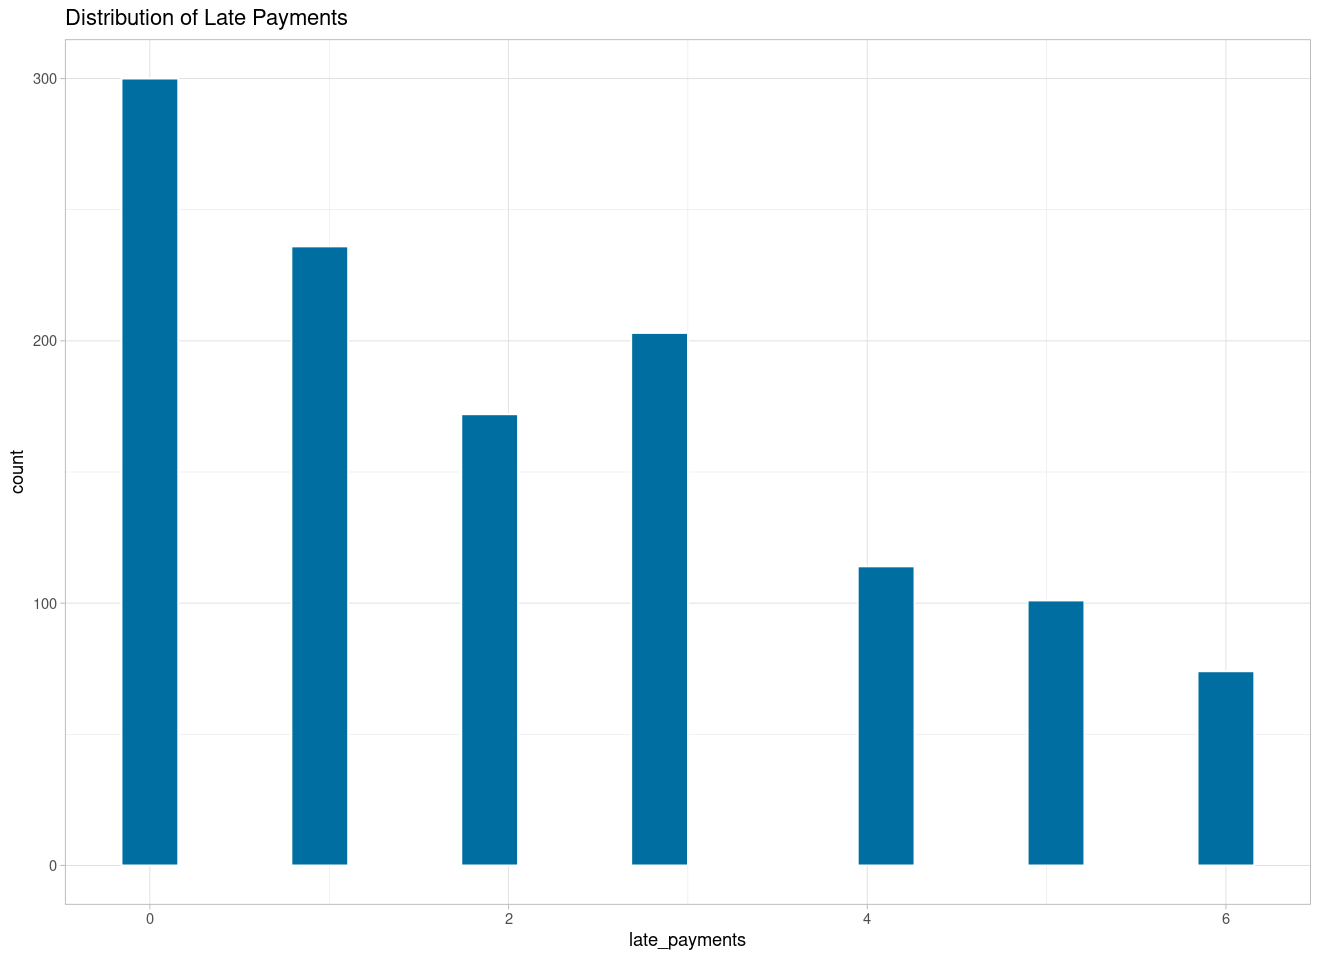

In [8]:
# late_payments
ggplot(data = churn_df, mapping = aes(x = late_payments)) +
  geom_histogram(fill = '#006EA1', color = 'white', bins = 20) +
  labs(title = 'Distribution of Late Payments') +
  theme_light()

## Feature Engineering Recipe

Now we can create a feature engineering recipe for this data. We will train the following transformations on our training data.

- Remove skewness from numeric predictors
- Normalize all numeric predictors
- Create dummy variables for all nominal predictors

In [7]:
churn_recipe <- 
  recipe(churn ~ ., data = churn_training) %>% 
  step_YeoJohnson(all_numeric(), -all_outcomes()) %>% 
  step_normalize(all_numeric(), -all_outcomes()) %>% 
  step_dummy(all_nominal(), -all_outcomes())

<br>

Let's check to see if the feature engineering steps have been carried out correctly.

In [8]:
churn_recipe %>% 
  prep(training = churn_training) %>% 
  bake(new_data = NULL)

monthly_charges,late_payments,churn,enrollment_discount_no,tv_plan_no,movie_plan_no
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
-0.47479690,-1.3835834,no,1,1,1
-1.24101904,1.0055085,no,1,0,1
-0.27900399,-1.3835834,no,0,0,1
0.21794921,-1.3835834,no,0,1,0
-1.46611692,-1.3835834,no,1,1,1
-1.26073976,0.6099686,no,1,1,0
-1.43140096,-0.4787131,no,1,0,1
0.42781555,-0.4787131,no,0,1,1
-0.22276048,-1.3835834,no,1,1,0


## LDA Model Specification

Linear discriminant analysis is specified with the `discrim_regularized` function. The optional `frac_common_cov` is used to specify an LDA or QDA model. 

For LDA, we set `frac_common_cov = 1`. This instructs `discrim_regularied` that we are assuming that each class in the response variable has the same variance. This is the core assumption of the LDA model.

FOR QDA, we set `frac_common_cov = 0`, indicating that each class within our response variable has its own class-specific variance.

In [9]:
lda_model <- 
  discrim_regularized(frac_common_cov = 1) %>% 
  set_engine('klaR') %>% 
  set_mode('classification')

## Create a Workflow

Next we create a workflow that combines our feature engineering steps and LDA model.

In [10]:
lda_wf <- 
  workflow() %>% 
  add_model(lda_model) %>% 
  add_recipe(churn_recipe)

## Train and Evaluate With `last_fit()`

Finally we will train our model and estimate performance on our test data set using the `last_fit()` function.

In [11]:
last_fit_lda <- 
  lda_wf %>% 
  last_fit(split = churn_split)

<br>

To obtain the metrics on the test set (accuracy and roc_auc by default) we use `collect_metrics()`. Based on area under the ROC curve, our model has a "B".

In [12]:
last_fit_lda %>% collect_metrics()

.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
accuracy,binary,0.7906977,Preprocessor1_Model1
roc_auc,binary,0.8645992,Preprocessor1_Model1


<br>

We can also obtain a data frame with test set results by using the `collect_predictions()` function. In the code below, we call this `lda_predictions`. It contains the estimated probabilities for customers canceling their service, `.pred_yes`, the predicted class of our response variable, `.pred_class`, and the truth, `churn`.

In [13]:
lda_predictions <- last_fit_lda %>% 
                     collect_predictions()

lda_predictions

id,.pred_yes,.pred_no,.row,.pred_class,churn,.config
<chr>,<dbl>,<dbl>,<int>,<fct>,<fct>,<chr>
train/test split,0.432600338,0.567399662,1,no,yes,Preprocessor1_Model1
train/test split,0.956746229,0.043253771,4,yes,yes,Preprocessor1_Model1
train/test split,0.052220556,0.947779444,6,no,no,Preprocessor1_Model1
train/test split,0.431687580,0.568312420,14,no,yes,Preprocessor1_Model1
train/test split,0.101354136,0.898645864,16,no,no,Preprocessor1_Model1
train/test split,0.421096091,0.578903909,20,no,no,Preprocessor1_Model1
train/test split,0.741950717,0.258049283,22,yes,yes,Preprocessor1_Model1
train/test split,0.863717075,0.136282925,23,yes,no,Preprocessor1_Model1
train/test split,0.005175631,0.994824369,28,no,no,Preprocessor1_Model1


<br>

We can use this data frame to make an ROC plot by using `roc_curve()` and `autoplot()`.

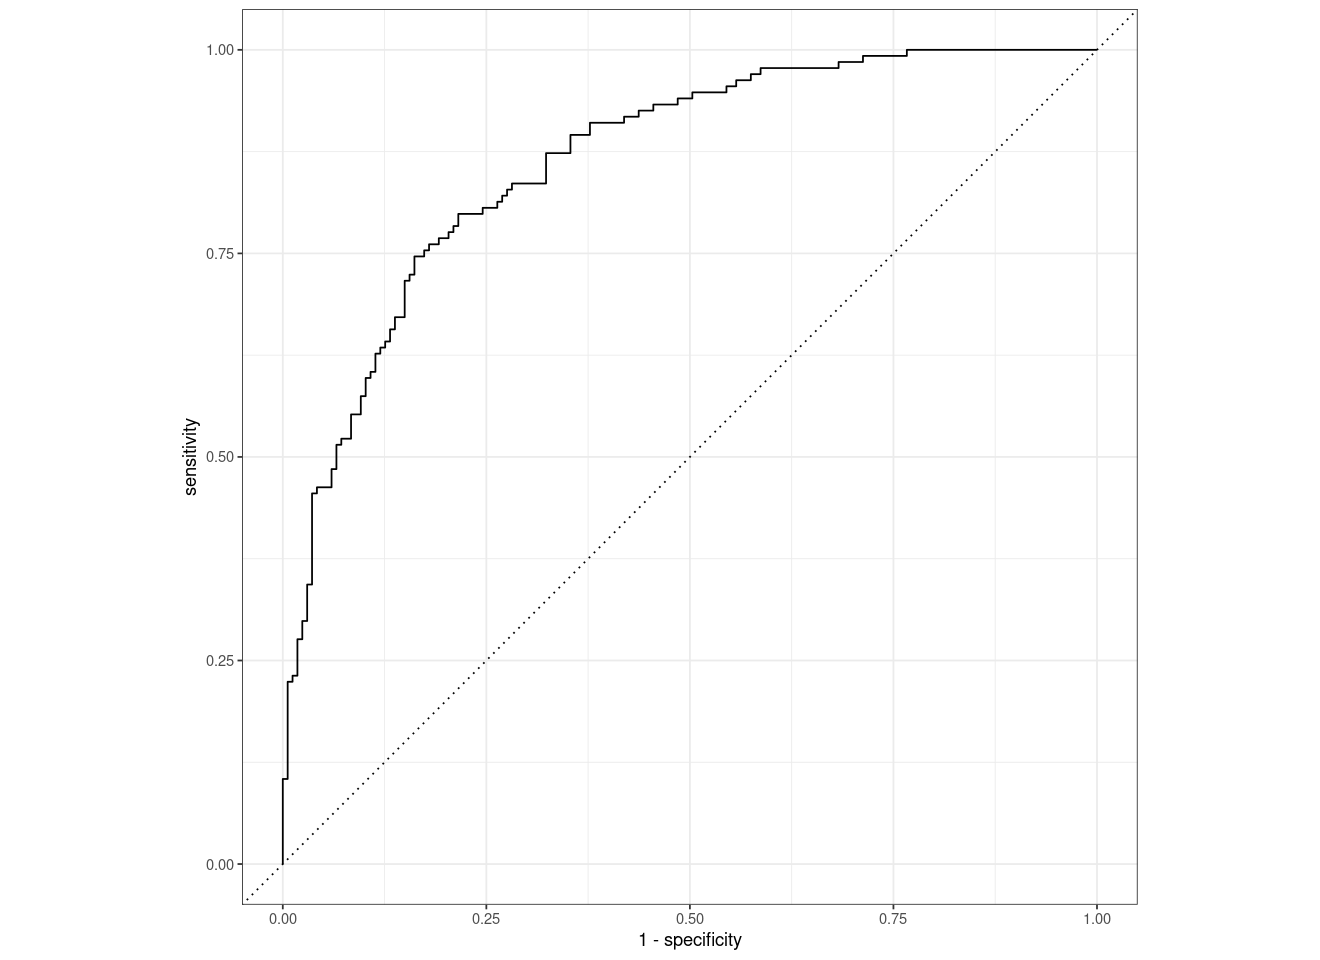

In [14]:
lda_predictions %>% 
  roc_curve(truth = churn, .pred_yes) %>% 
  autoplot()

<br>

We can also use the `lda_predictions` results to explore the confusion matrix and other performance metrics, such as the F1 score, on our test data.

### Confusion Matrix

We see that our model made 36 false negatives and 39 false positives. In this case, predicting that a customer will not cancel their service when in fact they do seems like the more costly error.

In [15]:
conf_mat(lda_predictions, truth = churn, estimate = .pred_class)

          Truth
Prediction yes  no
       yes 101  30
       no   33 137

## F<sub>1</sub> Score

In [16]:
f_meas(lda_predictions, truth = churn, estimate = .pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
f_meas,binary,0.7622642


# Quadratic Discriminant Analysis

To fit a quadratic discriminant analysis model, we will have to make some minor adjustments to our workflow from the previous section. We have already split our data and trained our feature engineering steps so we only need to create a new QDA model specification with `discrim_regularized()` and a new workflow object.

## QDA Model Specification

FOR QDA, we set `frac_common_cov = 0`, indicating that each class within our response variable has its own class-specific variance.

In [17]:
qda_model <- 
  discrim_regularized(frac_common_cov = 0) %>% 
  set_engine('klaR') %>% 
  set_mode('classification')

## Create a Workflow

Next we create a QDA workflow object that combines our feature engineering steps from the previous section and our QDA model.

In [18]:
qda_wf <- 
  workflow() %>% 
  add_model(qda_model) %>% 
  add_recipe(churn_recipe)

## Train and Evaluate With `last_fit()`

Finally we will train our model and estimate performance on our test data set using the `last_fit()` function.

In [19]:
last_fit_qda <- 
  qda_wf %>% 
  last_fit(split = churn_split)

<br>

Based on the area under the ROC curve, our QDA model had similar performance to our LDA model. Remember that QDA is a more complicated model than LDA since we are estimating more parameters. 

Since we didn't get any improvement in terms of model performance, it is always recommended to choose the simpler model if we are deciding which one to use in production.

In [20]:
last_fit_qda %>% collect_metrics()

.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
accuracy,binary,0.7873754,Preprocessor1_Model1
roc_auc,binary,0.8623201,Preprocessor1_Model1


# K-Nearest Neighbor

In this section we will learn how to perform regression and classification using the k-nearest neighbor (KNN) algorithm and hyperparameter tuning with cross validation.

## Classification

We will use KNN to predict whether customers will cancel their service in our `chrun_df` data. To do this, we have to adjust our machine learning workflow by incorporating hyperparameter tuning.

## Data Splitting and Cross Validation

<p align="center">
<img 
  src="./files/cross_validation_1.jpg"
  width="550"
  height="auto"
/>
</p>

Since we need to perform hyperparameter tuning, we need to add the extra step of creating cross validation folds from our training data. This is done with the `vfold_cv()` function.

In the code below, we further split our `churn_training` data into folds with `vfold_cv()`. The `v` parameter specifies how many folds to create. In our example below, we are creating 5 folds.

In [21]:
### Create folds for cross validation on the training data set
## These will be used to tune model hyperparameters
## Set the random seed in order to get the same folds next time!
set.seed(314)

churn_folds <- vfold_cv(churn_training, v = 5)

## Feature Engineering

Since we have already trained our feature engineering steps, we can use the `churn_recipe` in our KNN modeling.

### KNN Model Specification

The `nearest_neighbor()` function from the `parnsip` package serves as a general interface to KNN modeling engines in `R`. It has the following important hyperparameter:

- `neighbors`	- A single integer for the number of neighbors to consider (often called K). For the "kknn" engine, a value of 5 is used if neighbors is not specified

To determine the optimal value of `neighbors`, we need to perform hyperparameter tuning. Whenever we have a hyperparameter we would like to tune, we must set it equal to `tune()` in our model specification. In the code below, we specify our KNN classification model with the "kknn" engine.

In [22]:
knn_model <- 
  nearest_neighbor(neighbors = tune()) %>% 
  set_engine('kknn') %>% 
  set_mode('classification')

### Creating a Workflow

As before the next step is to create a workflow with our recipe and model.

In [23]:
knn_wf <- 
  workflow() %>% 
  add_model(knn_model) %>% 
  add_recipe(churn_recipe)

## Hyperparameter tuning

Hyperparameter tuning is performed using a grid search algorithm. To do this, we must create a data frame with a column name that matches our hyperparameter, `neighbors` in this case, and values we wish to test. 

In the code below we use the `tibble()` function to create a data frame with values of `neighbors` ranging from 10 to 150. Our goal here is to choose a range of values to test, from small to relatively large numbers of neighbors.

In [24]:
## Create a grid of hyperparameter values to test
k_grid <- tibble(neighbors = c(10, 20, 30, 50, 75, 100, 125, 150))

<br>



In [25]:
# View grid
k_grid

neighbors
<dbl>
10
20
30
50
75
100
125
150


<br>

Now that we have a data frame with the values of `neighbors` to test, we can use the `tune_grid()` function to determine the optimal value of our hyperparameter.

The `tune_grid()` function takes a model or workflow object, cross validation folds, and a tuning grid as arguments. It is recommended to use `set.seed()` before hyperparameter tuning so that you can reproduce your results at a later time.

In [27]:
## Tune  workflow
set.seed(314)

knn_tuning <- 
  knn_wf %>% 
  tune_grid(resamples = churn_folds, grid = k_grid)

<br>

To view the results of our hyperparameter tuning, we can use the `show_best()` function. We must pass the type of performance metric we would like to see into the `show_best()` function.

From the results below, we see that for each value of `neighbors` we specified, `tune_grid()` fit a KNN model with that parameter value 5 times (since we have 5 folds in our cross validation object). The `mean` column in the results below indicates the average value of the performance metric that was obtained.

In [28]:
## Show the top 5 best models based on roc_auc metric
knn_tuning %>% show_best('roc_auc')

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
150,roc_auc,binary,0.8817898,5,0.006935688,Preprocessor1_Model8
125,roc_auc,binary,0.8799596,5,0.006720961,Preprocessor1_Model7
30,roc_auc,binary,0.8780402,5,0.009396877,Preprocessor1_Model3
100,roc_auc,binary,0.8776775,5,0.006803536,Preprocessor1_Model6
50,roc_auc,binary,0.8772146,5,0.007532504,Preprocessor1_Model4


<br>

We can use the `select_best()` model to select the model from our tuning results that had the best overall performance. In the code below, we specify to select the best performing model based on the `roc_auc` metric. We see that the model with 150 neighbors performed the best.

In [29]:
## Select best model based on roc_auc
best_k <- 
  knn_tuning %>% 
  select_best(metric = 'roc_auc')

## View model
best_k

neighbors,.config
<dbl>,<chr>
150,Preprocessor1_Model8


<br>

The last step is to use `finalize_workflow()` to add our optimal model to our workflow object.

In [30]:
## Finalize workflow by adding the best performing model
final_knn_wf <- 
  knn_wf %>% 
  finalize_workflow(best_k)

## Train and Evaluate With `last_fit()`

After we have tuned our hyperparameter, `neighbors`, and finalized our workflow object with the optimal model, we perform the same last steps as before. We will train our model and estimate performance on our test data set using the `last_fit()` function.

In [31]:
last_fit_knn <- final_knn_wf %>% 
                last_fit(split = churn_split)

<br>

Based on area under the ROC curve, our model has a "B-" and performs slightly worse than LDA and QDA.

In [32]:
last_fit_knn %>% collect_metrics()

.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
accuracy,binary,0.7707641,Preprocessor1_Model1
roc_auc,binary,0.8603986,Preprocessor1_Model1


## ROC Curve 

Let's also have a look at our ROC curve and confusion matrix.

In [33]:
knn_predictions <- 
  last_fit_knn %>% 
  collect_predictions()

knn_predictions

id,.pred_yes,.pred_no,.row,.pred_class,churn,.config
<chr>,<dbl>,<dbl>,<int>,<fct>,<fct>,<chr>
train/test split,0.47884621,0.52115379,1,no,yes,Preprocessor1_Model1
train/test split,0.79138869,0.20861131,4,yes,yes,Preprocessor1_Model1
train/test split,0.11615977,0.88384023,6,no,no,Preprocessor1_Model1
train/test split,0.41215765,0.58784235,14,no,yes,Preprocessor1_Model1
train/test split,0.28596718,0.71403282,16,no,no,Preprocessor1_Model1
train/test split,0.43452924,0.56547076,20,no,no,Preprocessor1_Model1
train/test split,0.64977927,0.35022073,22,yes,yes,Preprocessor1_Model1
train/test split,0.74566222,0.25433778,23,yes,no,Preprocessor1_Model1
train/test split,0.04832954,0.95167046,28,no,no,Preprocessor1_Model1


<br>

We can use this data frame to make an ROC plot by using `roc_curve()` and `autoplot()`.

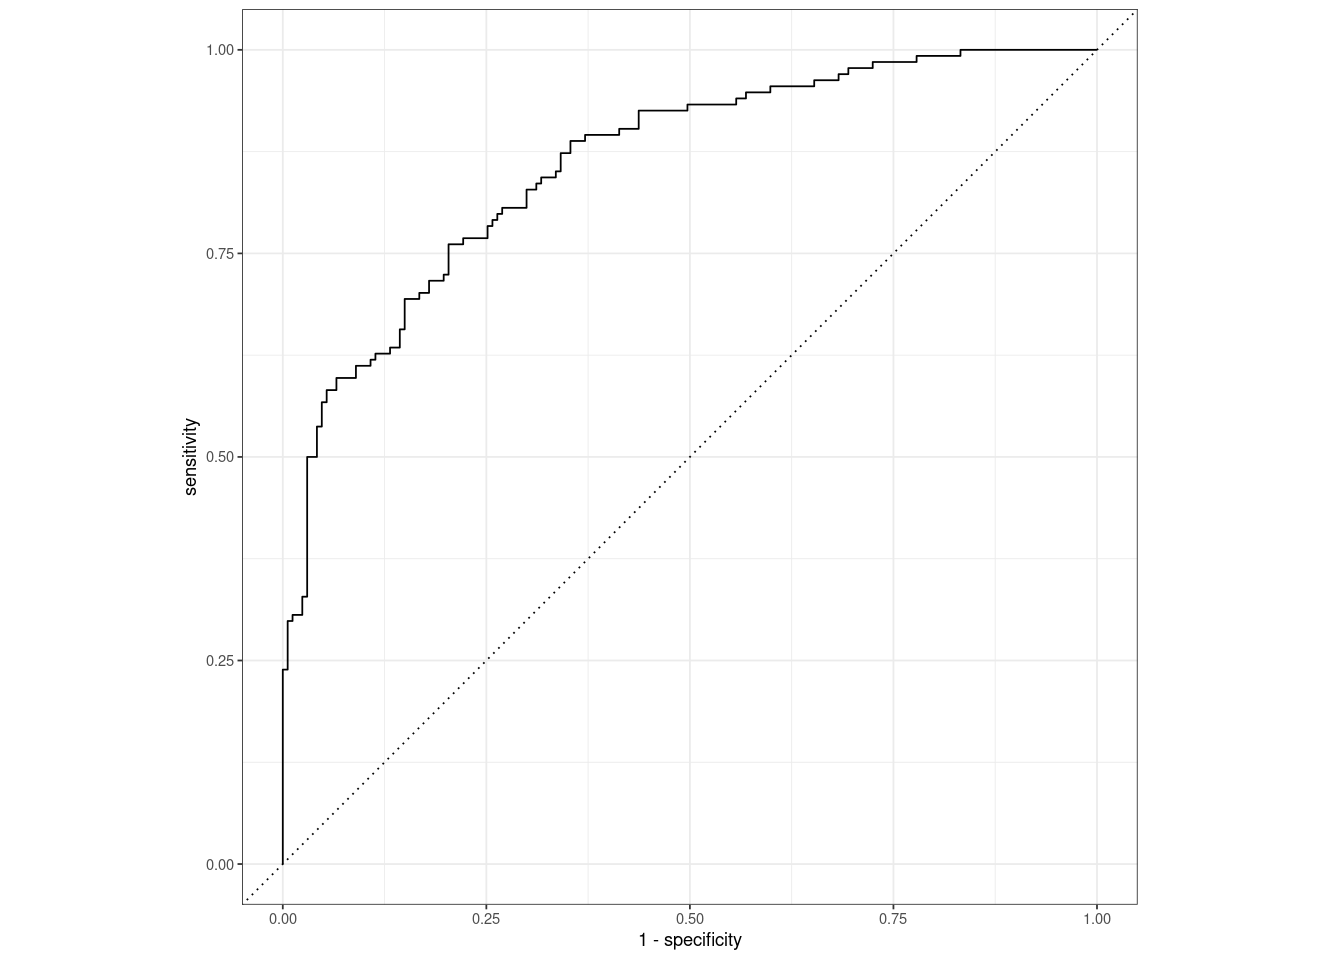

In [34]:
knn_predictions %>% 
  roc_curve(truth = churn, estimate = .pred_yes) %>% 
  autoplot()

## Confusion Matrix

We see that our model made 40 false negatives and 29 false positives.

In [35]:
conf_mat(knn_predictions, truth = churn, estimate = .pred_class)

          Truth
Prediction yes  no
       yes  94  29
       no   40 138

## Regression

In this final section, we will demonstrate a complete machine learning workflow that incorporates hyperparameter tuning. We will use KNN to predict the selling price of homes using the `home_sales` data.

### Data Splitting

First we split our data into training and test sets. We also create 5 cross validation folds from our training data for hyperparameter tuning.

In [36]:
set.seed(271)

# Create a split object
homes_split <- 
  initial_split(home_sales, prop = 0.75, strata = selling_price)

# Build training data set
homes_training <-
  homes_split %>% 
  training()

# Build testing data set
homes_test <- 
  homes_split %>% 
  testing()

## Cross Validation folds
homes_folds <- vfold_cv(homes_training, v = 5)

## Feature Engineering

Next, we specify our feature engineering recipe. In this step, we **do not** use `prep()` or `bake()`. This recipe will be automatically applied in a later step using the `workflow()` and `last_fit()` functions.

For our model formula, we are specifying that `selling_price` is our response variable and all others are predictor variables.

In [39]:
homes_recipe <- 
  recipe(selling_price ~ ., data = homes_training) %>% 
  step_YeoJohnson(all_numeric(), -all_outcomes()) %>% 
  step_normalize(all_numeric(), -all_outcomes()) %>% 
  step_dummy(all_nominal(), - all_outcomes())

<br>

As an intermediate step, let's check our recipe by prepping it on the training data and applying it to the test data. We want to make sure that we get the correct transformations.

From the results below, things look correct.

In [40]:
homes_recipe %>% 
  prep(training = homes_training) %>% 
  bake(new_data = homes_test)

house_age,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_basement,floors,scenic_views,selling_price,city_Bellevue,⋯,city_Kent,city_Kirkland,city_Maple.Valley,city_North.Bend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Woodinville
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.02167885,3.0729663,0.96535237,0.25021807,0.504198423,-0.5419884,0.0558618,-0.2108066,280000,0,⋯,0,0,0,0,0,0,0,0,0,0
0.74859106,-0.5618516,1.91221731,1.13175952,0.584697559,1.8573417,0.0558618,-0.2108066,795000,0,⋯,0,0,0,0,1,0,0,0,0,0
0.84117499,0.7151545,0.46785363,1.07106189,0.829432582,1.8661040,0.0558618,-0.2108066,835000,0,⋯,0,0,0,0,1,0,0,0,0,0
0.65431572,-0.5618516,-0.04791317,0.51560566,0.477769402,-0.5419884,0.0558618,-0.2108066,738000,0,⋯,0,0,0,0,1,0,0,0,0,0
-0.41800752,0.7151545,-0.04791317,1.95195879,0.670174123,-0.5419884,0.0558618,-0.2108066,885000,0,⋯,0,0,0,0,0,0,1,0,0,0
-0.67607634,0.7151545,2.80375915,1.22119400,0.406374580,-0.5419884,0.0558618,-0.2108066,785500,0,⋯,0,0,0,0,0,0,1,0,0,0
-0.41800752,0.7151545,-0.04791317,1.77393482,0.253773360,-0.5419884,0.0558618,-0.2108066,815000,0,⋯,0,0,0,0,0,0,1,0,0,0
-0.96020933,-0.5618516,-0.04791317,-1.04592883,-0.660667334,-0.5419884,0.0558618,-0.2108066,330000,0,⋯,0,0,0,0,0,1,0,0,0,0
1.44955285,-0.5618516,-0.04791317,-0.50558466,0.178676273,-0.5419884,0.0558618,-0.2108066,268000,0,⋯,0,0,0,0,0,0,0,0,0,0


## KNN Regression Model Specification

Next, we specify our KNN regression model with `nearest_neighbor()`. We set `neighbors` to `tune()` for hyperparameter tuning and make sure to set the mode to **regression**.

In [41]:
knn_reg <- 
  nearest_neighbor(neighbors = tune()) %>% 
  set_engine('kknn') %>% 
  set_mode('regression')

## Create a Workflow

Next, we combine our model and recipe into a workflow object.

In [42]:
knn_reg_wf <- 
  workflow() %>% 
  add_model(knn_reg) %>% 
  add_recipe(homes_recipe)

## Hyperparameter tuning

Let's test the same values of `neighbors` as before.

In [43]:
## Create a grid of hyperparameter values to test
k_grid_reg <- tibble(neighbors = c(10, 20, 30, 50, 75, 100, 125, 150))

In [44]:
# View grid
k_grid_reg

neighbors
<dbl>
10
20
30
50
75
100
125
150


<br>

Now that we have a data frame with the values of `neighbors` to test, we can use the `tune_grid()` function to determine the optimal value of our hyperparameter.

The `tune_grid()` function takes a model or workflow object, cross validation folds, and a tuning grid as arguments. It is recommended to use `set.seed()` before hyperparameter tuning so that you can reproduce your results at a later time.

In [45]:
## Tune  workflow
set.seed(314)

knn_reg_tuning <- 
  knn_reg_wf %>% 
  tune_grid(resamples = homes_folds, grid = k_grid_reg)

<br>

Since we are fitting a regression model, the performance metrics of interest include `rsq` and `rmse`. Let's use `show_best()` to display the best performing model based on R<sup>2</sup>

In [46]:
## Show the top 5 best models based on rsq metric
knn_reg_tuning %>% show_best('rsq')

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
20,rsq,standard,0.7472254,5,0.01217575,Preprocessor1_Model2
10,rsq,standard,0.7455125,5,0.01275604,Preprocessor1_Model1
30,rsq,standard,0.7427475,5,0.01228712,Preprocessor1_Model3
50,rsq,standard,0.7308661,5,0.01235263,Preprocessor1_Model4
75,rsq,standard,0.7154931,5,0.01288568,Preprocessor1_Model5


<br>

We can use the `select_best()` model to select the model from our tuning results that had the best overall performance. In the code below, we specify to select the best performing model based on the `rsq` metric. We see that the model with 20 neighbors performed the best.

In [47]:
## Select best model based on roc_auc
best_k_reg <- 
  knn_reg_tuning %>% 
  select_best(metric = 'rsq')

## View model
best_k_reg

neighbors,.config
<dbl>,<chr>
20,Preprocessor1_Model2


<br>

The last step is to use `finalize_workflow()` to add our optimal model to our workflow object.

In [48]:
## Finalize workflow by adding the best performing model
final_knn_reg_wf <- 
  knn_reg_wf %>% 
  finalize_workflow(best_k_reg)

## Train and Evaluate With `last_fit()`

Finally, we process our machine learning workflow with `last_fit()`.

In [49]:
homes_knn_fit <- 
  final_knn_reg_wf %>% 
  last_fit(split = homes_split)

<br>

To obtain the performance metrics and predictions on the test set, we use the `collect_metrics()` and `collect_predictions()` functions on our `homes_knn_fit` object.

In [50]:
# Obtain performance metrics on test data
homes_knn_fit %>% collect_metrics()

.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
rmse,standard,8.978047e+04,Preprocessor1_Model1
rsq,standard,7.634077e-01,Preprocessor1_Model1


<br>

We can save the test set predictions by using the `collect_predictions()` function. This function returns a data frame which will have the response variables values from the test set and a column named `.pred` with the model predictions.

In [51]:
# Obtain test set predictions data frame
homes_knn_results <- 
  homes_knn_fit %>% 
  collect_predictions()

# View results
homes_knn_results

id,.pred,.row,selling_price,.config
<chr>,<dbl>,<int>,<dbl>,<chr>
train/test split,348419.0,1,280000,Preprocessor1_Model1
train/test split,760464.2,13,795000,Preprocessor1_Model1
train/test split,769879.0,14,835000,Preprocessor1_Model1
train/test split,741702.3,18,738000,Preprocessor1_Model1
train/test split,838464.9,40,885000,Preprocessor1_Model1
train/test split,808781.7,42,785500,Preprocessor1_Model1
train/test split,797560.5,47,815000,Preprocessor1_Model1
train/test split,318057.7,50,330000,Preprocessor1_Model1
train/test split,288513.9,53,268000,Preprocessor1_Model1


## R<sup>2</sup> Plot 

Finally, let's use the `homes_knn_results` data frame to make an R<sup>2</sup> plot to visualize our model performance on the test data set. The `coord_obs_pred()` function will set the x and y axis scales to be identical and the `scale_*_continuous()` functions convert the axis labels to comma format. This will make the plot easier to interpret.

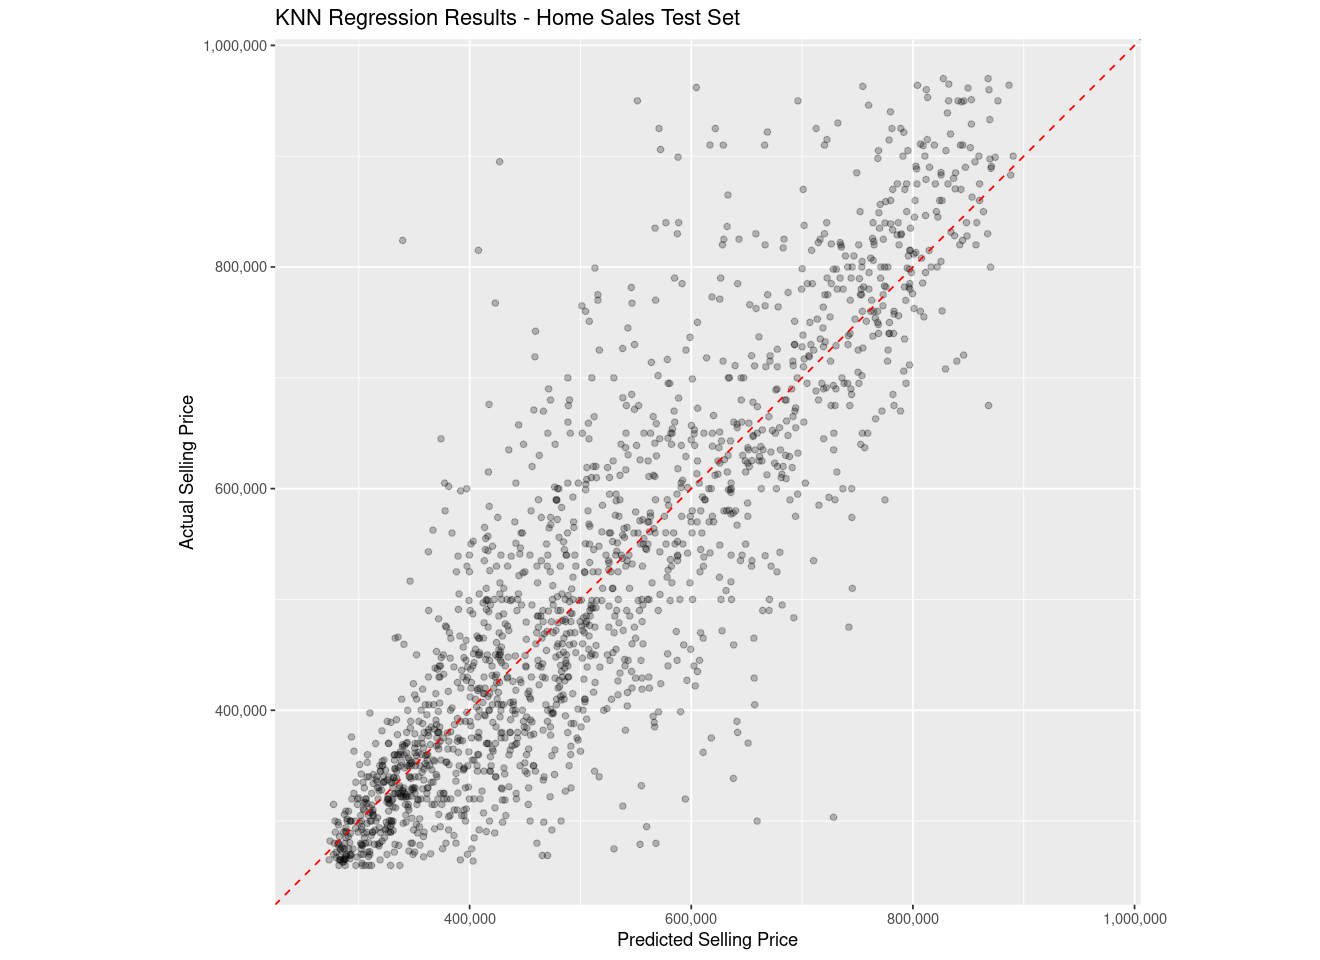

In [52]:
ggplot(data = homes_knn_results,
       mapping = aes(x = .pred, y = selling_price)) +
  geom_point(alpha = 0.25) +
  geom_abline(intercept = 0, slope = 1, color = 'red', linetype = 2) +
  coord_obs_pred() +
  scale_y_continuous(labels = scales::comma) +
  scale_x_continuous(labels = scales::comma) +
  labs(title = 'KNN Regression Results - Home Sales Test Set',
       x = 'Predicted Selling Price',
       y = 'Actual Selling Price')